# Связные списки

Связные списки – это структура данных, состоящая из элементов, называемых узлами, где каждый узел содержит данные и ссылку на следующий узел в последовательности.

## Основные понятия

1. **Узел** (Node):
    Каждый узел состоит из двух частей: данных и ссылки (или указателя) на следующий узел.

2. **Голова** (Head):
    Первый узел в списке. Через него начинается доступ ко всему списку.

3. **Хвост** (Tail):
    Последний узел в списке, ссылка на следующий узел у которого равна `null` или `None`.

## Типы Связных Списков

1. **Односвязный список** (Singly Linked List):
    Каждый узел содержит ссылку только на следующий узел.

    ```plaintext
        Head -> [Data|Next] -> [Data|Next] -> [Data|Next] -> None
    ```

2. **Двусвязный список** (Doubly Linked List):
    Каждый узел содержит ссылки и на следующий, и на предыдущий узел.

    ```plaintext
        None <-> [Prev|Data|Next] <-> [Prev|Data|Next] <-> [Prev|Data|Next] <-> None
    ```

3. **Циклический связный список** (Circular Linked List):
    Последний узел ссылается на первый, создавая круг.

    ```plaintext
        Head -> [Data|Next] -> [Data|Next] -> [Data|Next] -> Head
    ```

## Операции со Связным Списком

1. **Вставка** (Insertion):
    - В начало списка.
    - В конец списка.
    - В середину списка.

2. **Удаление** (Deletion):
    - Удаление головы.
    - Удаление последнего элемента.
    - Удаление определенного узла.

3. **Поиск** (Search):
    - Поиск элемента по значению.

## Примеры на Python

### Односвязный Список

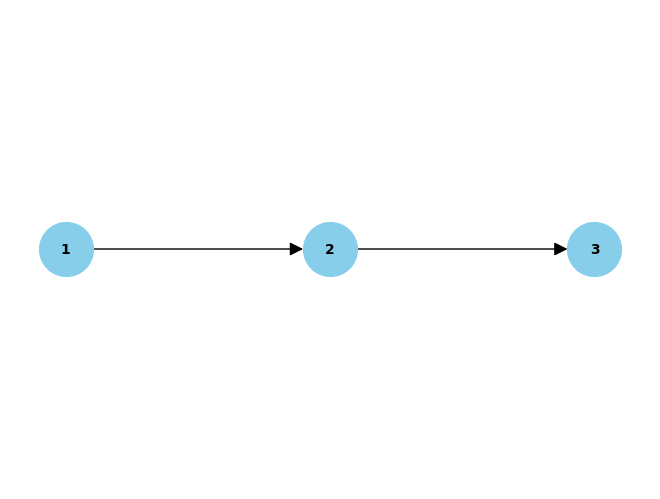

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SinglyLinkedList:
    def __init__(self):
        self.head = None
    
    def append(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node
    
    def visualize(self):
        G = nx.DiGraph()
        pos = {}
        labels = {}
        current = self.head
        index = 0

        while current:
            G.add_node(index)
            pos[index] = (index, 0)
            labels[index] = current.data
            if current.next:
                G.add_edge(index, index + 1)
            current = current.next
            index += 1

        nx.draw(G, pos, labels=labels, with_labels=True, arrows=True, node_size=1500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
        plt.show()

# Создаем список и добавляем элементы
list = SinglyLinkedList()
list.append(1)
list.append(2)
list.append(3)

# Визуализируем список
list.visualize()

### Двусвязный Список

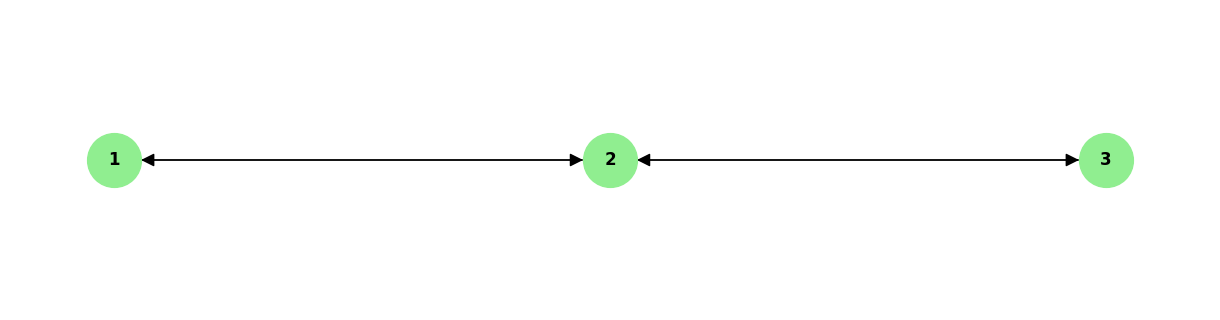

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None
    
    def append(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node
        new_node.prev = last
    
    def visualize(self):
        G = nx.DiGraph()
        pos = {}
        labels = {}
        current = self.head
        index = 0

        while current:
            G.add_node(index)
            pos[index] = (index, 0)
            labels[index] = current.data
            if current.next:
                G.add_edge(index, index + 1)
            if current.prev:
                G.add_edge(index, index - 1)
            current = current.next
            index += 1

        plt.figure(figsize=(12, 3))  # Подгоняем размер под длинный двусвязный список
        nx.draw(G, pos, labels=labels, with_labels=True, arrows=True, node_size=1500, node_color='lightgreen', font_size=12, font_color='black', font_weight='bold', arrowsize=20)
        plt.show()

# Создаем список и добавляем элементы
list = DoublyLinkedList()
list.append(1)
list.append(2)
list.append(3)

# Визуализируем список
list.visualize()

### Задача: LRU Cache (LeetCode #146)

#### Условия задачи:
Реализовать структуры данных для LRU Cache. Она должна поддерживать две операции: `get` и `put`.
- `get(key)`: Возвращает значение (которое всегда является положительным) ключа, если ключ существует в кэше, иначе возвращает -1.
- `put(key, value)`: Вставляет элемент в кэш. Если кэш достиг своего предела, он должен выбросить самое давнее неиспользуемое (Least Recently Used) элемент перед вставкой нового элемента.

Решение должно выполняться за `O(1)`.

### Решение:
Мы будем использовать комбинацию двусвязного списка и хэш-таблицы для достижения выполнения операций за `O(1)`.

1. Двусвязный список для отслеживания порядка использования элементов.
2. Хэш-таблицу для быстрого доступа к элементам по ключу.

Вставлен ключ 1, значение 1.


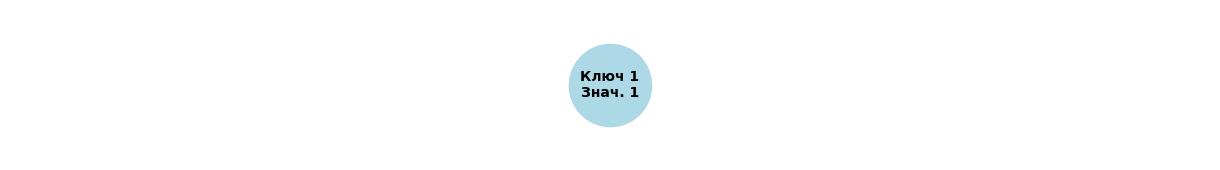

Вставлен ключ 2, значение 2.


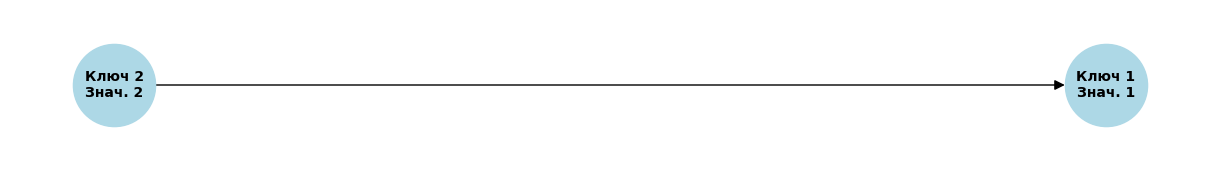

Получен ключ 1, значение 1. Перемещен в начало.


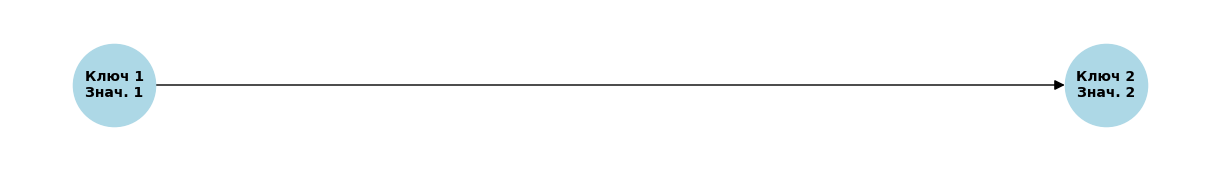

Кэш заполнен. Удалится наиболее редко используемый ключ 2, значение 2.
Вставлен ключ 3, значение 3.


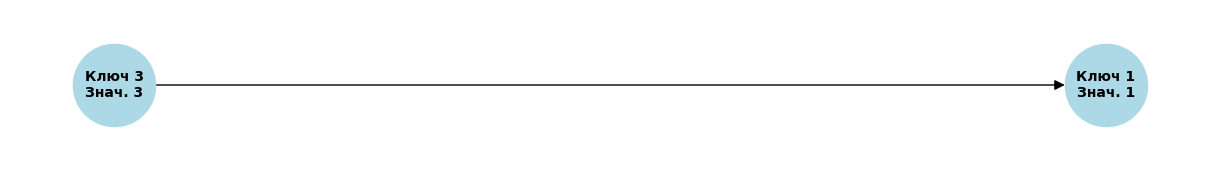

Ключ 2 не найден в кэше.


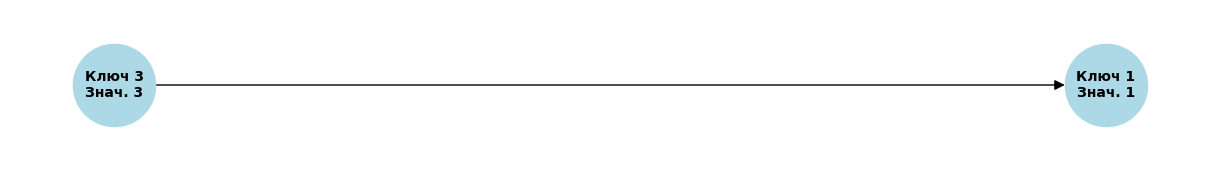

Кэш заполнен. Удалится наиболее редко используемый ключ 1, значение 1.
Вставлен ключ 4, значение 4.


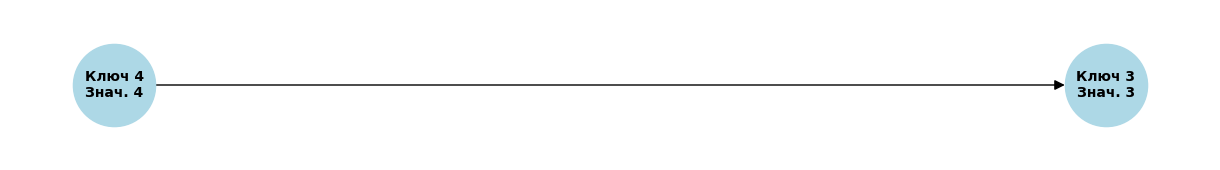

Ключ 1 не найден в кэше.


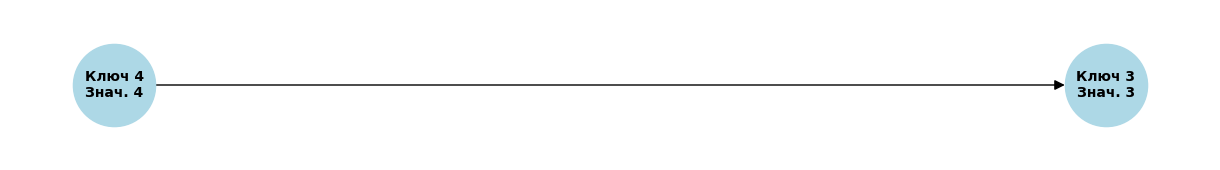

Получен ключ 3, значение 3. Перемещен в начало.


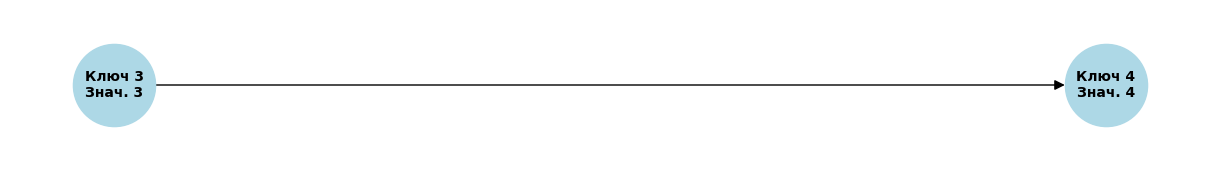

Получен ключ 4, значение 4. Перемещен в начало.


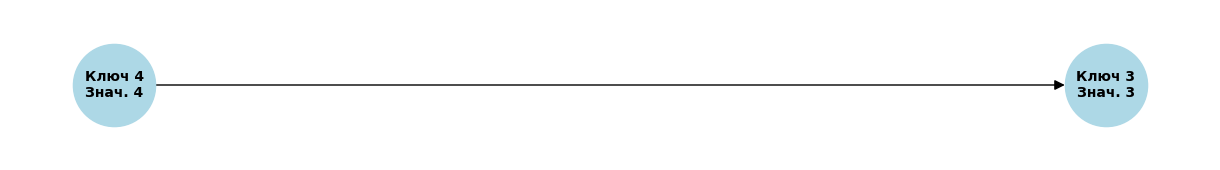

4

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

class DLinkedNode:
    def __init__(self, key=0, value=0):
        self.key = key
        self.value = value
        self.prev = None
        self.next = None

class LRUCache:

    def _add_node(self, node):
        """Always add the new node right after head."""
        node.prev = self.head
        node.next = self.head.next

        self.head.next.prev = node
        self.head.next = node

    def _remove_node(self, node):
        """Remove an existing node from the linked list."""
        prev = node.prev
        new = node.next

        prev.next = new
        new.prev = prev

    def _move_to_head(self, node):
        """Move certain node in between to the head."""
        self._remove_node(node)
        self._add_node(node)

    def _pop_tail(self):
        """Pop the current tail."""
        res = self.tail.prev
        self._remove_node(res)
        return res

    def __init__(self, capacity: int):
        self.cache = {}
        self.capacity = capacity
        self.size = 0
        self.head, self.tail = DLinkedNode(), DLinkedNode()

        self.head.next = self.tail
        self.tail.prev = self.head

    def get(self, key: int) -> int:
        node = self.cache.get(key, None)
        if not node:
            print(f"Ключ {key} не найден в кэше.")
            self.visualize()
            return -1

        self._move_to_head(node)
        print(f"Получен ключ {key}, значение {node.value}. Перемещен в начало.")
        self.visualize()
        return node.value

    def put(self, key: int, value: int) -> None:
        node = self.cache.get(key)

        if not node: 
            newNode = DLinkedNode(key, value)

            self.cache[key] = newNode
            self._add_node(newNode)

            self.size += 1

            if self.size > self.capacity:
                tail = self._pop_tail()
                print(f"Кэш заполнен. Удалится наиболее редко используемый ключ {tail.key}, значение {tail.value}.")
                del self.cache[tail.key]
                self.size -= 1

            print(f"Вставлен ключ {key}, значение {value}.")
        else:
            node.value = value
            self._move_to_head(node)
            print(f"Обновлен ключ {key}, значение {value}. Перемещен в начало.")
        
        self.visualize()

    def visualize(self):
        G = nx.DiGraph()
        pos = {}
        labels = {}

        current = self.head.next
        index = 0
        step = 0.5  # Меньший шаг между узлами

        while current != self.tail:
            G.add_node(index)
            pos[index] = (index * step, 0)
            labels[index] = f"Ключ {current.key}\nЗнач. {current.value}"
            
            if current.prev != self.head:
                G.add_edge(index - 1, index)
            current = current.next
            index += 1

        plt.figure(figsize=(12, 1.5))
        nx.draw(G, pos, labels=labels, with_labels=True, arrows=True, node_size=3500, node_color='lightblue', font_size=10, font_family='sans-serif', font_weight='bold', arrowsize=15)
        plt.show()

# Пример использования:
cache = LRUCache(2)

# Операции над кэшем
cache.put(1, 1)
cache.put(2, 2)
cache.get(1)    # Возвращает 1
cache.put(3, 3)         # Вытесняет ключ 2
cache.get(2)    # Возвращает -1 (не найдено)
cache.put(4, 4)         # Вытесняет ключ 1
cache.get(1)    # Возвращает -1 (не найдено)
cache.get(3)    # Возвращает 3
cache.get(4)    # Возвращает 4

LRU (Least Recently Used) Cache — это тип алгоритма кэширования, который используется в различных системах и приложениях для повышения производительности и оптимизации использования памяти. Вот несколько примеров, где используется LRU Cache:

### 1. Операционные системы:
Операционные системы часто используют LRU Cache для управления памятью, особенно для кэширования страниц памяти. Когда количество доступных свободных страниц ограничено, система может использовать LRU Cache для отслеживания, какие страницы были использованы недавно, и высвобождать страницы, использовавшиеся давным-давно.

### 2. Веб-браузеры:
Веб-браузеры используют LRU Cache для хранения недавно посещенных страниц и ресурсов (картинок, стилей, скриптов). Это позволяет быстрее загружать страницы, если пользователь возвращается к ним, так как данные уже сохранены в кэше.

### 3. Базы данных:
В системах управления базами данных (DBMS), таких как MySQL или PostgreSQL, используются LRU Cache для кэширования запросов и страниц данных. Это помогает значительно улучшить производительность, так как часто запрашиваемые данные могут быстро извлекаться из кэша вместо чтения с диска.

### 4. CDN (Content Delivery Networks):
CDN сервисы, такие как Cloudflare или Akamai, используют LRU Cache для кэширования статических ресурсов (таких как изображения, видео, файлы CSS/JS) на граничных серверах. Это снижает нагрузку на основной сервер и ускоряет доставку контента пользователям.

### 5. Кэширование файлов:
LRU Cache также используется в файловых системах, таких как NFS (Network File System), для кэширования недавно доступных файлов. Это позволяет ускорить доступ к файлам, которые используются часто, уменьшая задержки операций ввода-вывода.

### 6. Адаптивные системы:
Адаптивные системы, такие как системы рекомендаций, могут использовать LRU Cache для хранения недавних вычислений и рекомендаций. Это помогает системе быстро реагировать на запросы пользователей, повторно используя результаты прошлых вычислений.